# A case study in linear regression
Now that we have the preliminaries out of the way, we're ready to dive in and do some machine learning. In this notebook, I'll provide a basic overview of some core concepts in machine learning, and then, as a case study, we'll take a look at one particular application of machine learning that you're probably already familiar with, but may not have previously thought of as machine learning: linear regression.

Our first step is to import all of the core tools we're going to use repeatedly throughout this tutorial. This is conventional in Python; the idea is that consolidating all of the imports at the top helps us organize and keep track of all the external libraries and tools we're using.

In [12]:
# the workhorse numerical computing package in Python
import numpy as np

# we've already encountered this specimen
import pandas as pd

# matplotlib is Python's main plotting library.
# the plt module provides high-level access to plots.
import matplotlib.pyplot as plt

# this is our data retrieval helper from the first notebook
from support import get_features

Additionally, let's also import the personality data we described in the first notebook.

In [2]:
data = pd.read_csv('data/Johnson-2014-IPIP-300.tsv.gz', sep='\t', )

### What *is* machine learning?
We're about a quarter of the way into the second notebook of our machine learning tutorial, and we still haven't even defined machine learning! This is probably a good time to do that. Here's a working definition of machine learning: it's the field of science (or, depending on who you ask, engineering) that seeks to build systems capable of learning from experience. This is a very broad definition, and in practice, the set of activities that get labeled "machine learning" is pretty heterogeneous. However, two elements are common to nearly all machine learning applications: (a) the emphasis is on developing algorithms that can learn (semi-)autonomously from data, rather than static rule-based systems that must be explicitly designed or updated by humans; and (b) algorithm evaluation focuses heavily on ability to meet objective quantitative targets.

### Supervised vs. unsupervised learning
Machine learning techniques come in two general flavors: *supervised learning* and *unsupervised learning*. Learning is supervised whenever we know the true values that our model is trying to predict, and hence, are in a position to "supervise" the learning process by quantifying prediction accuracy and making iterative adjustments. Conventional multiple regression analysis (i.e., "ordinary" least-squares regression) is an example of supervised learning, because our model takes as its input both a vector of features (conventionally labeled `X`) and a vector of labels (`y`). We often use different terminology in ther social and biomedical sciences—calling `X` our set of variables or predictors, and `y` our outcome or dependent variable—but the basic idea is the same.

Here's an example of supervised learning:

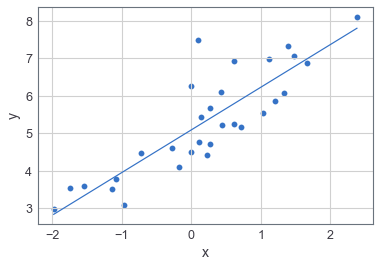

In [13]:
# generate correlated variables
np.random.seed(10)
x = np.random.normal(size=30)
y = np.random.normal(x + 5, 1)

# scatter plot
plt.scatter(x, y)
plt.xlabel("x", fontsize=14);
plt.ylabel("y", fontsize=14)

# linear regression using numpy's least-squares solver;
# we won't use this approach past this point
X = np.c_[np.ones(30), x]
coefs = np.linalg.lstsq(X, y, rcond=None)[0]

# generate the regression line
x_range = np.linspace(x.min(), x.max())
y_pred = coefs[0] + coefs[1] * x_range

# plot regression line
plt.plot(x_range, y_pred);

By contrast, learning is unsupervised when there's no ground truth or right answer, and the goal is just to learn some useful structure from the data. The learning algorithm receives no direct guidance about how well it's performing.

For example, suppose someone hands us the following data, with no further explanation:

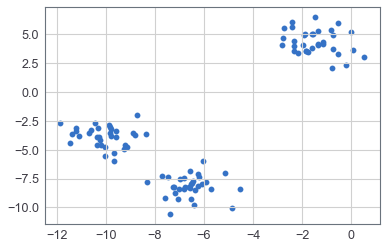

In [4]:
# scikit-learn has some handy utilities for generating structure data
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
plt.scatter(*X.T);

It would be natural to think that these data are generated from three distinct *clusters*. But since the data are unlabeled, we don't know for a fact that this assignment is correct; we're inferring the grouping in an unsupervised way, based on whatever principle are built into our estimation method (e.g., our visual system's tendency to group objects together based on proximity).

### Supervised learning: classification vs. regression
We'll come back to unsupervised learning later in this tutorial, when we talk about dimensionality reduction. But for the most part, we'll be focusing on supervised learning.

Within the class of supervised learning problems, we can draw a central distinction between *classification* problems and *regression* problems. In both cases, the goal is to develop a predictive model that recovers the true labels as accurately as possible. The difference between the two lies in the nature of the labels: in classification, the labels are discrete; in regression, they're continuous.

For example, building a model that can take a structural brain image as input and output a prediction about whether the brain belongs to a dog or a cat is a classification problem, because the output is discrete: each brain belongs to one of the two classes (or categories), and no brain ever takes on an an intermediate value (though our classifiers can certainly make a graded or probabilistic prediction about which class a brain belongs to). By contrast, predicting age from personality is a regression problem, because the labels (people's age) vary continuously.

Traditionally, machine learning tutorials tend to start with classification and then move onto regression. I suspect this is partly because classification problems are intuitively easier to understand, and partly because much of applied machine learning focuses on problems involving discrete outcomes (e.g., every email ultimately gets classified as `SPAM` or `NOT SPAM`; most email clients don't have `DEBATABLY SPAM` folder). In our case, though, we're going to invert this sequence and focus almost exclusively on regression, because the analysis of continuous outcomes is vastly more common in the social sciences than the analysis of categorical ones. Conceptually, most of what goes for regression also holds for classification, and vice versa.

### Least-squares regression as supervised machine learning
If you're like most social scientists, you're probably new to machine learning, but have a fair amount of experience with traditional inferential statistics, including linear regression. If this describes you, and you're a bit nervous about the brave new world of ML, I have some good news: you've been doing machine learning this whole time!

No, really. Garden-variety least-squares regression is a supervised machine learning technique. And so are other non-garden varieties of regression. In fact, *any* procedure that can take some labelled data as input and use that data to predict labels for other, unseen observations can be considered a supervised machine learning technique.

##### Estimators in scikit-learn
This principle—of defining supervised learning methods in terms of what they *do*, rather than in terms of their internal algorithmic structure—is at the very core of the `scikit-learn` machine learning package. Scikit-learn defines an object called an `Estimator`. The `Estimator` object does exactly what the word *estimator* normally means in statistics: it implements ["a rule for calculating an estimate of a given quantity based on observed data"](https://en.wikipedia.org/wiki/Estimator).

While scikit-learn includes hundreds of different estimators that generate predictions in very different ways, they all share a common interface. In particular, they all implement `.fit()` and `.predict()` methods. When we call an estimator's `.fit()` method, we're telling it to take some training data—including both `X` and `y` values—and learn how to predict `y` from `X`. When we call `predict()`, we're asking the estimator to take some `X` rows (which could be either ones we've seen before, or entirely new ones) and predict corresponding `y` scores.

To see this in action, let's take a look at least-squares regression in scikit-learn. We'll begin with a very simple task: we want to predict people's age from their scores on the Big Five domains.

In [14]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression estimator. The default
# parameters work fine for our purposes.
est = LinearRegression()

# Use our handy helper to get the X and y values.
# let's sample 1000 subjects from the full dataset
X, y = get_features(data, 'domains', 'AGE', n=1000)

# Fit the model
est.fit(X, y)

# Generate predictions
y_pred = est.predict(X)

That's it! Every single estimator in scikit-learn (and there are hundreds) will follow the same basic fit/predict pattern.

##### Rolling our own estimators
We'll take a look at how well our linear regression model did in just a moment But first, I want to take a moment to show you something. While I promised you that this wouldn't be a programming or scikit-learn tutorial, I can't resist one small demonstration, which I think nicely illustrates the idea that any method that can `fit()` some `X` and `y` data, and make predictions for new `X` data, can be considered a supervised learning estimator.

What we're going to do here is implement a brand new, never-before-seen, machine learning estimator. It's a very fancy estimator. I call it the `NoisyMedianPredictor`.

Here it is, in all its glory:

In [19]:
# base scikit-learn estimator
from sklearn.base import BaseEstimator

# defines a new Python class that inherits from BaseEstimator
class NoisyMedianPredictor(BaseEstimator):
    
    # the mandatory fit() method
    def fit(self, X, y):
        self.median_ = np.median(y)
        self.std_ = 0.2 * y.std()

    # the mandatory predict method
    def predict(self, X):
        return np.random.normal(self.median_, self.std_, size=len(X))

That's it! In about 6 lines of code, we just invented and implemented an entirely new machine learning algorithm. You should be impressed!

What does our `NoisyMedianPredictor` estimator do? I'm glad you asked. It works as follows: when you give it some training data, it selects the median `y` value. It also stores the standard deviation of the `y` values. Thereafter, any time you ask it to make a prediction for a new data point, it returns the sum of the saved median plus some normal error based on the variance of the old `y` values.

You might scoff at this and say, "but that's ridiculous—your estimator isn't even using the `X` values in the training data set! And it's predicting essentially the same value for all new observations!"

Well, you *could* say that. And you'd be right. But that's not the point. The point is that we just wrote a completely new method we can use to do machine learning, and it barely took any work at all. This is meant to convince you that doing machine learning is easy. (The rest of the tutorial will be spent trying to convince you that it's actually not so easy at all, so let's just enjoy this moment.)

Okay, at this point I'm finally ready to admit that the `NoisyMedianPredictor` is ridiculous. I just wanted to de-mystify the process of writing estimators, and give you an appreciation of the fact that, at its core, even our `NoisyMedianPredictor` is doing the same kind of thing as `LinearRegression` and hundreds of other estimators implemented in scikit-learn. It's just doing it very, very, badly.

##### Performance metrics
How well does our model perform? At this point, if you're used to a point-and-click package like SPSS, or a stats-oriented language like R, you're probably expecting to see a big dump of information that includes things like regression coefficient estimates and standard errors, p-values, $R^2$ values, and so on. Well... you're not going to get those here. You *can* get those using other Python packages; for example StatsModels will give you [something very similar](https://www.statsmodels.org/dev/regression.html) to R's `lm` summary):




In [15]:
import statsmodels.formula.api as smf

model = smf.ols('AGE ~ Neuroticism + Extraversion + Openness + Agreeableness + Conscientiousness', data=data)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3827.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        14:49:24   Log-Likelihood:            -5.2565e+05
No. Observations:              145388   AIC:                         1.051e+06
Df Residuals:                  145382   BIC:                         1.051e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7743      0.380     44.126      0.000      16.029      17.519
Neuroticism          -1.3833      0.045    -30.949      0.000      -1.471      -1.296
Extraversion         -4.2711      0.049    -86.944      0.000      -4.367      -4.175
Openness              1.3030      0.056     23.095      0.000       1.192       1.414
Agreeableness         1.7133      0.053     32.161      0.000       1.609       1.818
Conscientiousness     4.3250      0.050     86.181      0.000       4.227       4.423
==============================================================================
Omnibus:                    37988.404   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96632.634
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                       5.785   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

...but that's not really what machine learning (or scikit-learn) is about. Instead, the focus is on prediction; typically, we have some objective quantitative metric we care about, and to the degree that a model can produce better values on that metric, we incline to evaluate it more favorably. This doesn't mean that we have to single-mindedly base our evaluation of model on just one quantity; in practice, many other considerations may come into play (e.g., computational efficiency, interpretability, etc.). The point is mainly that machine learning practitioners—at least in applied settings—tend to care much more than traditional scientists do about what models can actually *do*, and much less about what's going on inside them.

For the rest of this tutorial, we're going to focus our attention on one particular metric of predictive performance: the coefficient of determination, or $R^2$. This shouldn't be taken as an indication that there's anything special about $R^2$; in fact, in many applications, it's a pretty bad metric, because it's defined as the proportion of *variance* explained in one's data, and completely ignores the absolute deviation of predictions from the true scores (i.e., a model can have an $R^2$ of 1 while generating a predicted score distribution entirely outside the range of the true scores). For this tutorial though, we'll exclusively use $R^2$ as our metric, because (a) psychologists seem to really like it, and one of my objectives here is to fool psychologists into caring about machine learning; and (b) in the case of personality data, absolute scores generally don't mean anything anyway—personality psychologists are almost always interested in how variation in personality relates to variation in some other measure or construct.

The good news is that, if you don't like $R^2$, you can easily replace `r2_score` with one of the other predefined metrics in scikit-learn (e.g., `mean_squared_error`)—or use an arbitrary scoring function you provide yourself.

Let's see how well the linear regression model we fitted earlier (using the 5 Big Five domains as predictors) explains the variance in age:

In [16]:
# the metrics module contains predefined scoring functions
# for commonly used metrics like r^2, MSE, etc. but you
# can use any function you like as long as it has the
# signature used in the r2_score call below
from sklearn.metrics import r2_score

# scoring functions are called by passing an array of
# true scores and and an array of predicted scores as
# inputs
r2_score(y, y_pred)

0.12396221966593302

We can explain about 11% of the variance in age using people's Big Five scores.

At this point we have a fully operational machine learning workflow: we've specified our linear regression estimator, fitted it to some data, used it to generate predictions, and scored those predictions to get an estimate of performance. We could, if we were so inclined, stop here, pat ourselves on the back for a job well done, and head home for the day.

For reasons that will shortly become clear, though, calling it quits here would be a bad idea. Instead, let's dig a little deeper. We'll start by asking an important question that echoes back to the definition of machine learning as the study of systems that can improve their output by learning from experience. Specifically: how does our model's performance evolve as we give it more data? Intuitively, we might expect that our $R^2$ will go up as we increase the size of our dataset. But we should probably verify that.

Instead of fitting our `LinearRegression` estimator to just one dataset, let's systematically vary our sample size over a large range, and fit a linear regression to each one (actually, to stabilize our performance estimates, we'll average over multiple permutations at each sample size).

The code below is much more involved than it needs to be; as we'll see in the next section, scikit-learn includes a number of utilities that can achieve the same goal much more compactly and efficiently. But I think it can be helpful to explicitly lay out all of the steps we're going through before we replace them with a single line of black magic.

In [21]:
# initialize the OLS estimator
est = LinearRegression()

# we'll plot a separate panel for each feature set
feature_sets = ['domains', 'facets', 'items']

# evaluate performance at each of these sample sizes
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

# number of permutations to average over at each sample size
n_reps = 10

# store results for all permutations, sample sizes, and feature sets
results = np.zeros((n_reps, len(sample_sizes), len(feature_sets)))

# loop over permutations
for i in range(n_reps):
    # loop over sample sizes
    for j, n in enumerate(sample_sizes):
        # get the appropriate features and labels
        *Xs, age = get_features(data, *feature_sets, 'AGE', n=n)
        # loop over feature sets
        for k, X in enumerate(Xs):
            # fit the model
            est.fit(X, age)
            # generate predictions
            pred_y = est.predict(X)
            # save R^2 in our results array
            results[i, j, k] = r2_score(age, pred_y)

# Compute means and stdevs for error bars 
r2_mean = results.mean(0)
r2_std = results.std(0)

Now we can plot the resulting $R^2$ values for each feature set as a function of sample size:

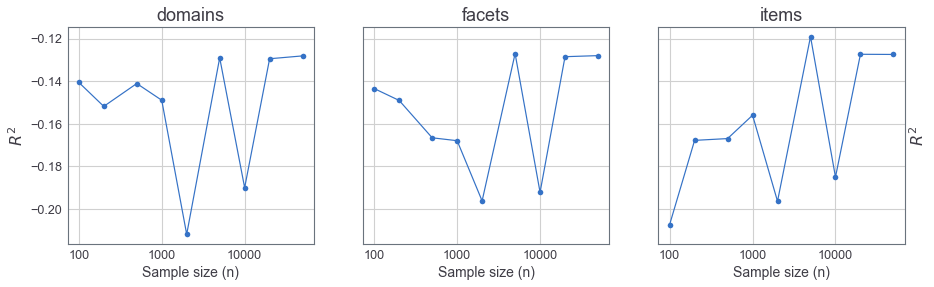

In [23]:
# used to display axis tick labels on a linear scale
from matplotlib.ticker import ScalarFormatter

# Set up plots=
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.ylim(0, 1)

# Plot results
for i, label in enumerate(feature_sets):
    mean, sd = r2_mean[:, i], r2_std[:, i]
    ax = axes[i]
    line = ax.plot(sample_sizes, mean, 'o-')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel("Sample size (n)", fontsize=14)
    ax.fill_between(sample_sizes, mean-sd, mean+sd, alpha=0.2)
    ax.set_title(label, fontsize=18)

# Add y-axis labels on both sides
axes[0].set_ylabel("$R^2$", fontsize=16);
axes[-1].set_ylabel('$R^2$', fontsize=16)
axes[-1].yaxis.set_label_position("right")

Strangely, it looks like model performance *decreases* with increasing sample size! You may find this odd, seeing as everyone's always talking about the wonders of Big Data, and intuitively, you might think that having more information available would lead the model to make *better* predictions.

Actually, the model probably *is* making better predictions when it has more data to learn form. It just doesn't look that way. The problem is not what's happening on the right side of the curve, but what's happening on the left side (i.e., when sample size is small). On the left, the model is *overfitting* the data. Because there are very few data points, and our model is extremely flexible (it has 300 degrees of freedom with which to predict only a few hundred points!), there's nothing to stop the model from learning noise rather than signal. As the sample size grows, the data provide a natural buffer against this kind of thing. We'll explore this idea in much more detail in the next couple of sections.

Before we go on though, let's deal with the elephant in the room: I know you're dying to know how well (or poorly) the `NoisyMedianPredictor` would do at predicting age from personality. So let's test that out. All you need to do is scroll up a few cells, and replace the `est = LinearRegression()` line with `est = NoisyMedianPredictor()`. Then re-run all the cells until the previous one. You, uh, might also want to uncomment the `plt.ylim(0, 1)` line in the plotting cell, which controls the y-axis limits.

Done all that? Got some noisy-median-estimated results?

Yeah, I know: they're not so great.